In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

plt.style.use('dark_background')

import tensorflow.keras 
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.layers import Activation,Dropout,Flatten,Dense

import os
import cv2
from PIL import Image
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam, SGD, RMSprop

import numpy as np
import keras

In [2]:
image_directory = 'E:/datasets/brainer/'
SIZE  = 150
dataset0 = []
label0 = []

In [3]:
glioma_images = os.listdir(image_directory +'g/')
for i, img_name in enumerate(glioma_images):
    
    if (img_name.split('.')[1] == 'jpg'):#image in jpg format
        image = cv2.imread(image_directory+'g/'+img_name)#cv2 to load image
        image = Image.fromarray(image, 'RGB')
        image = image.resize((SIZE,SIZE))
        dataset0.append(np.array(image))
        label0.append(0)#append label 0 to uninfected

In [4]:
meningioma_images = os.listdir(image_directory +'m/')
for i, img_name in enumerate(meningioma_images):
    
    if (img_name.split('.')[1] == 'jpg'):#image in jpg format
        image = cv2.imread(image_directory+'m/'+img_name)#cv2 to load image
        image = Image.fromarray(image, 'RGB')
        image = image.resize((SIZE,SIZE))
        dataset0.append(np.array(image))
        label0.append(1)#append label 0 to uninfected

In [5]:
healthy_images = os.listdir(image_directory +'h/')
for i, img_name in enumerate(healthy_images):
    
    if (img_name.split('.')[1] == 'jpg'):#image in jpg format
        image = cv2.imread(image_directory+'h/'+img_name)#cv2 to load image
        image = Image.fromarray(image, 'RGB')
        image = image.resize((SIZE,SIZE))
        dataset0.append(np.array(image))
        label0.append(2)#append label 0 to uninfected

In [6]:
pituitary_images = os.listdir(image_directory +'p/')
for i, img_name in enumerate(pituitary_images):
    
    if (img_name.split('.')[1] == 'jpg'):#image in jpg format
        image = cv2.imread(image_directory+'p/'+img_name)#cv2 to load image
        image = Image.fromarray(image, 'RGB')
        image = image.resize((SIZE,SIZE))
        dataset0.append(np.array(image))
        label0.append(3)#append label 0 to uninfected

In [7]:
dataset0 = np.array(dataset0)
label0 = np.array(label0)

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
dataset0,label0, test_size = 0.20, random_state = 0)

In [9]:
#scaling (normalise) of the data from the original range
from keras.utils.np_utils import normalize
X_train = normalize(X_train, axis=1)
X_test = normalize(X_test, axis=1)

In [10]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [11]:
os.environ['KERAS_BACKEND'] = 'tensorflow'

In [14]:
IMAGE_SIZE = 150
INPUT_SHAPE = (IMAGE_SIZE,IMAGE_SIZE,3)
inp = keras.layers.Input(shape=INPUT_SHAPE)

In [15]:

conv1 = keras.layers.Conv2D(32, (3,3), activation='relu', padding='same')(inp)

pool1 = keras.layers.MaxPooling2D(pool_size=(2,2))(conv1)
norm1 = keras.layers.BatchNormalization(axis = -1)(pool1)
drop1 = keras.layers.Dropout(rate=0.2)(norm1)

conv2 = keras.layers.Conv2D(32, (3,3), activation='relu', padding='same')(drop1)

pool2 = keras.layers.MaxPooling2D(pool_size=(2,2))(conv2)
norm2 = keras.layers.BatchNormalization(axis = -1)(pool2)
drop2 = keras.layers.Dropout(rate=0.2)(norm2)

flat = keras.layers.Flatten()(drop2)#flatten the matrix to get it ready for dense layer

hidden1 = keras.layers.Dense(512, activation='relu')(flat)
norm3 = keras.layers.BatchNormalization(axis = -1)(hidden1)
drop3 = keras.layers.Dropout(rate=0.2)(norm3)

hidden2 = keras.layers.Dense(256, activation='relu')(drop3)
norm4 = keras.layers.BatchNormalization(axis = -1)(hidden2)
drop4 = keras.layers.Dropout(rate=0.2)(norm4)

out = keras.layers.Dense(4, activation='softmax')(drop4)


In [16]:
model = keras.Model(inputs=inp, outputs=out)

model.compile(loss = "categorical_crossentropy",
                 optimizer = SGD(lr=0.001, momentum=0.9),
                 metrics=["accuracy"])

C:\Users\XerxesCodes\AppData\Roaming\Python\Python39\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [17]:
print(model.summary())

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 75, 75, 32)       128       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 75, 75, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 32)        9248  

In [18]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

#to prevent overfitting
es = EarlyStopping(monitor="val_accuracy", min_delta=0.01, patience= 3, verbose = 1, mode = 'auto')

mcp = ModelCheckpoint(monitor="val_accuracy", filepath="E:\datasets/brain_model8.h5",verbose= 1, save_best_only=True , mode = 'auto')

x = [es,mcp]

In [24]:
history = model.fit(X_train,
                   y_train,
                   batch_size = 16,
                   epochs = 10,
                   validation_data=(X_test,y_test),
                   shuffle = False,
                   callbacks = x
                   )

Epoch 1/10
13/13 [==============================] - ETA: 0s - loss: 0.0058 - accuracy: 1.0000
Epoch 1: val_accuracy did not improve from 0.84314
13/13 [==============================] - 42s 3s/step - loss: 0.0058 - accuracy: 1.0000 - val_loss: 0.6708 - val_accuracy: 0.8431
Epoch 2/10
13/13 [==============================] - ETA: 0s - loss: 0.0049 - accuracy: 1.0000
Epoch 2: val_accuracy did not improve from 0.84314
13/13 [==============================] - 11s 760ms/step - loss: 0.0049 - accuracy: 1.0000 - val_loss: 0.6737 - val_accuracy: 0.8431
Epoch 3/10
13/13 [==============================] - ETA: 0s - loss: 0.0028 - accuracy: 1.0000
Epoch 3: val_accuracy did not improve from 0.84314
13/13 [==============================] - 9s 676ms/step - loss: 0.0028 - accuracy: 1.0000 - val_loss: 0.6711 - val_accuracy: 0.8431
Epoch 4/10
13/13 [==============================] - ETA: 0s - loss: 0.0031 - accuracy: 1.0000
Epoch 4: val_accuracy did not improve from 0.84314
13/13 [=====================

In [22]:
print("Test Accuracy: {:.2f}%".format(model.evaluate(np.array(X_test), np.array(y_test))[1]*100))

2/2 [==============================] - 1s 423ms/step - loss: 0.6444 - accuracy: 0.8431
Test Accuracy: 84.31%


In [25]:
r = history.history
r.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

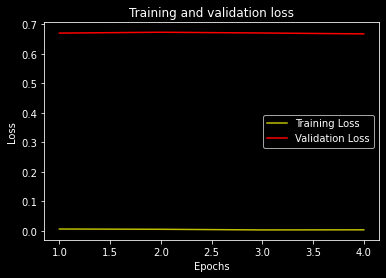

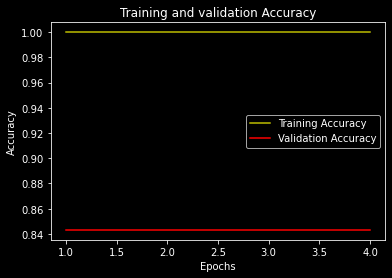

In [26]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
plt.plot(epochs, accuracy, 'y', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation Accuracy')
plt.title('Training and validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Test Model

In [27]:
from keras.models import load_model

model = load_model("E:\datasets/brain_model8.h5")

In [28]:
from keras.preprocessing.image import load_img, img_to_array
from keras.preprocessing import image

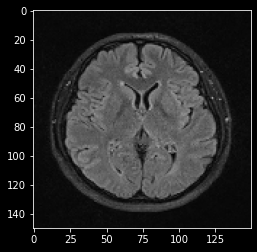

The prediction for this image is: Healthy Brain


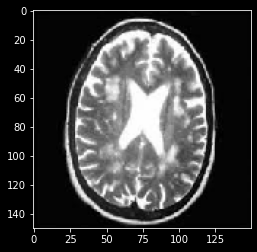

The prediction for this image is: Healthy Brain


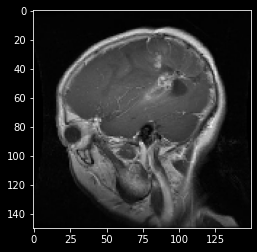

The prediction for this image is: Glioma tumor


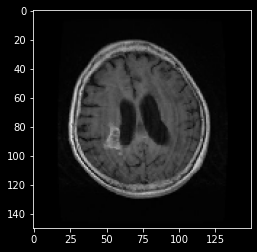

The prediction for this image is: Glioma tumor


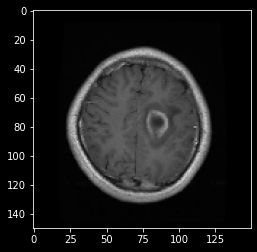

The prediction for this image is: Glioma tumor


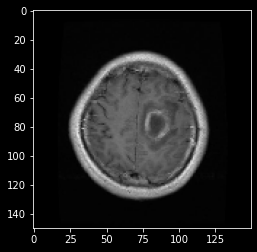

The prediction for this image is: Healthy Brain


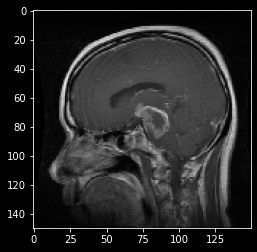

The prediction for this image is: Healthy Brain


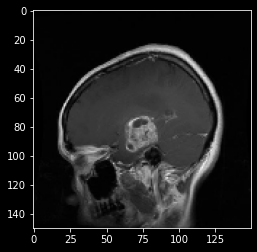

The prediction for this image is: Healthy Brain


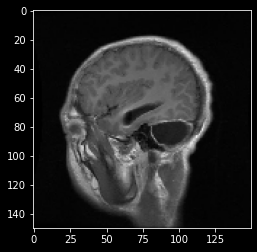

The prediction for this image is: Healthy Brain


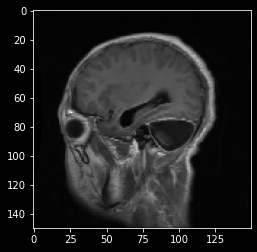

The prediction for this image is: Healthy Brain


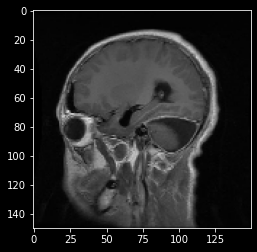

The prediction for this image is: Healthy Brain


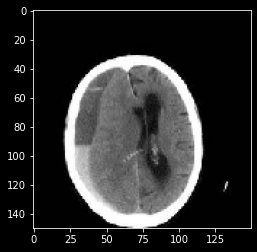

The prediction for this image is: Healthy Brain


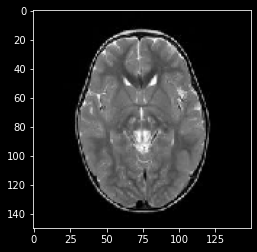

The prediction for this image is: Healthy Brain


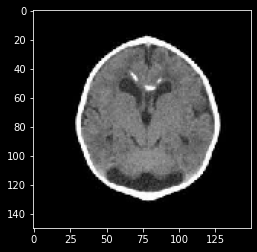

The prediction for this image is: Healthy Brain


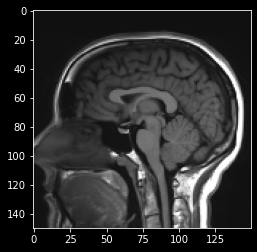

The prediction for this image is: Healthy Brain


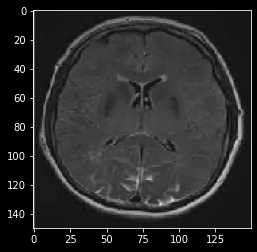

The prediction for this image is: Healthy Brain


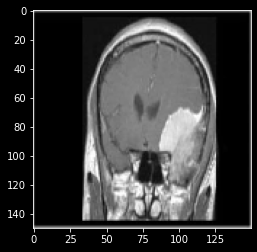

The prediction for this image is: Healthy Brain


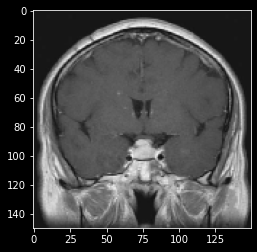

The prediction for this image is: Pituitary tumor


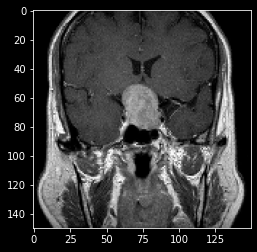

The prediction for this image is: Pituitary tumor


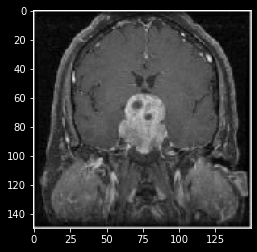

The prediction for this image is: Pituitary tumor


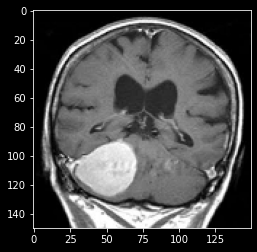

The prediction for this image is: Healthy Brain


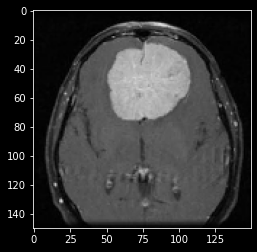

The prediction for this image is: Healthy Brain


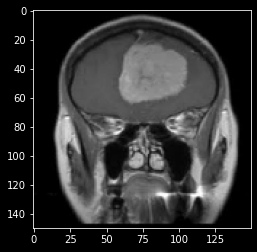

The prediction for this image is: Healthy Brain


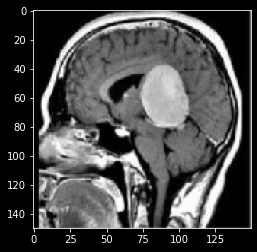

The prediction for this image is: Pituitary tumor


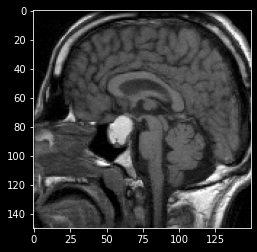

The prediction for this image is: Pituitary tumor


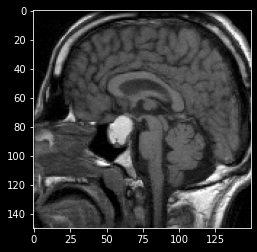

The prediction for this image is: Pituitary tumor


In [33]:
dir_path = 'E:/datasets/basedata'

for i in os.listdir(dir_path ):
    img = image.load_img(dir_path+'//'+ i,target_size=(150,150))
    plt.imshow(img)
    plt.show()
    
    X = image.img_to_array(img)#convert image to array
    X = np.expand_dims(X,axis = 0)#convert image to numpy array
    X /= 255.
    images = np.vstack([X])
    val = model.predict(images)
    prediction = np.argmax(val, axis=1)

    if prediction == 0:
         print("The prediction for this image is: Glioma tumor")
    elif prediction == 1:
         print("The prediction for this image is: Meningioma tumor")
    elif prediction == 2:
         print("The prediction for this image is: Healthy Brain")
    else:
         print("The prediction for this image is: Pituitary tumor")
        
    
    
   # print("The prediction for this image is: ", model.predict(np.argmax(images)))
    

classification matrix

In [31]:
preds = np.round(model.predict(X_test),0)#convert test data into a different numpy format, numpy array
print('rounded labels', preds)

rounded labels [[0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]]


In [32]:
from sklearn import metrics

tumors = ['glioma','meningioma','healthy','pituitary']
classification_matrix = metrics.classification_report(y_test, preds, target_names=tumors)
print(classification_matrix)

              precision    recall  f1-score   support

      glioma       1.00      1.00      1.00         7
  meningioma       0.73      0.73      0.73        15
     healthy       0.76      0.76      0.76        17
   pituitary       1.00      1.00      1.00        12

   micro avg       0.84      0.84      0.84        51
   macro avg       0.87      0.87      0.87        51
weighted avg       0.84      0.84      0.84        51
 samples avg       0.84      0.84      0.84        51



Convert Model To TFLite

In [34]:
path = "E:\datasets/brain_model8.h5"

In [ ]:
from keras.models import load_model
import tensorflow as tf

model = load_model(path)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

print("successfuly converted model to tflite")

with open('E:\datasets/brain_model0.tflite', 'wb') as f:
    f.write(tflite_model)